In [ ]:
# [CH2] - 개인 과제
# 1. **지도학습 과제** :: 주택 가격 예측 모델 구축

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import f_regression, SelectKBest

In [2]:
df = pd.read_csv('housingdata.csv')

In [126]:
df.head()
# print(df.isnull().sum())

,CRIM,INDUS,NOX,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,1,15.3,4.980000,24.0
1,0.02731,7.07,0.469,6.421,4.9671,2,17.8,9.140000,21.6
2,0.02729,7.07,0.469,7.185,4.9671,2,17.8,4.030000,34.7
3,0.03237,2.18,0.458,6.998,6.0622,3,18.7,2.940000,33.4
4,0.06905,2.18,0.458,7.147,6.0622,3,18.7,7.770592,36.2


In [3]:
# Step 01. 데이터 전처리 - 1) 결측치 처리

# 1. 결측치 컬럼값 대체
df['CRIM']  = df['CRIM'].fillna(df['CRIM'].median())
df['ZN']    = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['CHAS']  = df['CHAS'].fillna(0)
df['AGE']   = df['AGE'].fillna(df['AGE'].median())
# df["LSTAT"] = df['LSTAT'].fillna(0)

# 2. 결측값 예측을 통한 대체
df_with_na = df[df['LSTAT'].isnull()]
df_without_na = df[df['LSTAT'].notnull()]

# LSTAT과 상관관계 높은 컬럼 선택 (>= 0.5)
lstat_correlated_features = ['INDUS', 'NOX', 'AGE', 'TAX']

# 회귀 모델 학습
lr = LinearRegression()
X_train_lstat = df_without_na[lstat_correlated_features]
y_train_lstat = df_without_na["LSTAT"]
lr.fit(X_train_lstat, y_train_lstat)

# 결측값 예측
X_pred = df_with_na[lstat_correlated_features]
lstat_predicted_values = lr.predict(X_pred)

# 예측값으로 결측값 대체
df.loc[df["LSTAT"].isnull(), "LSTAT"] = lstat_predicted_values

# 3. 컬럼 삭제
df = df.drop(['ZN', 'CHAS', 'AGE', 'TAX', 'B'], axis=1)

In [4]:
# MEDV와 상관관계 높은 컬럼 선택 (>= 0.5)
medv_correlated_features = ['INDUS', 'NOX', 'RM', 'LSTAT']
# medv_correlated_features = ['INDUS', 'NOX', 'RM']
# medv_correlated_features = ['RM', 'LSTAT']

In [5]:
# Step 01. 데이터 전처리 - 2) 이상치 탐지 및 제거

# 1. 특정 열의 이상치 확인 (IQR 방법)
for col in medv_correlated_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # 이상치 제거
    df = df.drop(outliers.index)

print(len(df))

472


In [6]:
# Step 01. 데이터 전처리 - 3) 훈련 데이터 생성

X = df[medv_correlated_features]
# X = df[df.columns.difference(['MEDV'])]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 관게 높은 변수 5개 선택
# selector = SelectKBest(score_func=f_regression, k=5)

# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

In [8]:
# 1. 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)
lr_coef = lr.coef_
lr_intercept = lr.intercept_
print("선형 회귀 결과:")
print(f"RMSE: {lr_rmse:.2f}, R^2: {lr_r2:.2f}")

# 2. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print("\n랜덤 포레스트 결과:")
print(f"RMSE: {rf_rmse:.2f}, R^2: {rf_r2:.2f}")

# 3. 결정 트리 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print("\n결정 트리 결과:")
print(f"RMSE: {dt_rmse:.2f}, R^2: {dt_r2:.2f}")


선형 회귀 결과:
RMSE: 2.61, R^2: 0.81

랜덤 포레스트 결과:
RMSE: 2.33, R^2: 0.85

결정 트리 결과:
RMSE: 3.51, R^2: 0.65


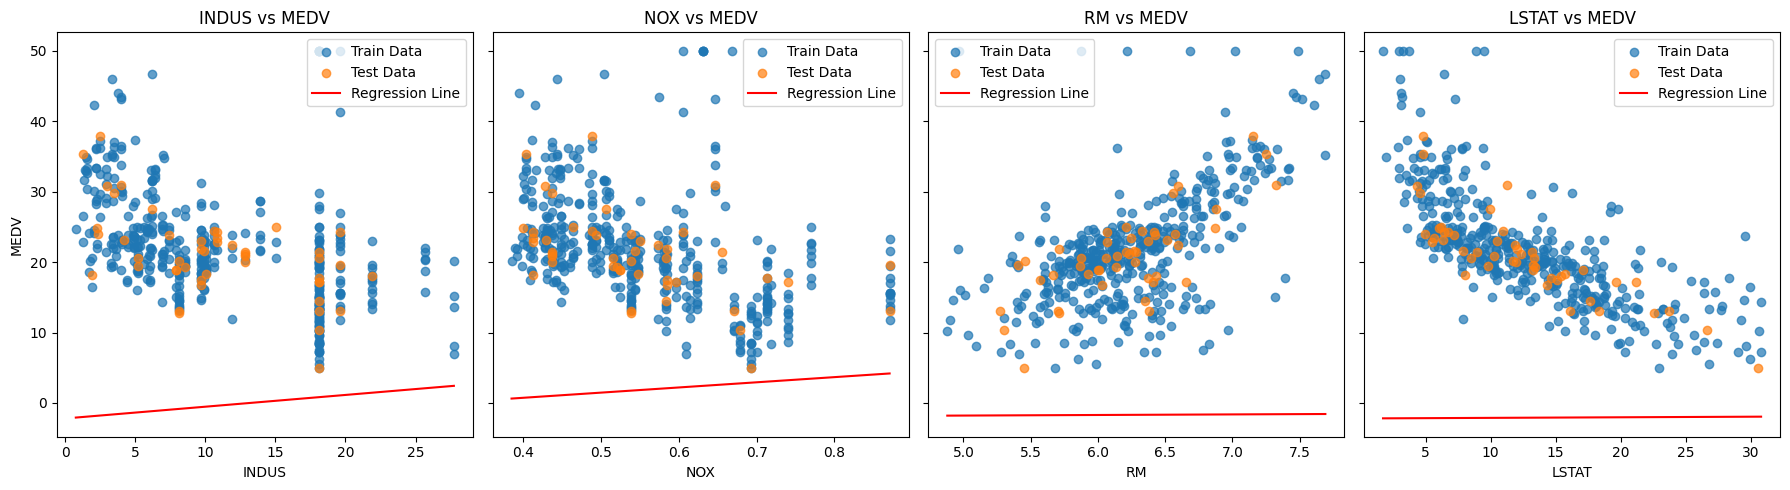

In [9]:
num_features = len(medv_correlated_features)

# 서브플롯 생성
fig, axes = plt.subplots(1, num_features, figsize=(18, 5), sharey=True)  # 1행 num_features열 서브플롯

for i, feature in enumerate(medv_correlated_features):
    # 현재 컬럼의 데이터와 범위 설정
    x_train = X_train[feature]
    x_test = X_test[feature]
    x_range = np.linspace(x_train.min(), x_train.max(), 100)
    y_range = lr_coef[i] * x_range + lr_intercept  # 회귀선 방정식: y = w * x + b

    # 산점도: 훈련 데이터와 테스트 데이터
    axes[i].scatter(x_train, y_train, label="Train Data", alpha=0.7)
    axes[i].scatter(x_test, y_test, label="Test Data", alpha=0.7)

    # 회귀선 추가
    axes[i].plot(x_range, y_range, color="red", label="Regression Line")

    # 서브플롯 설정
    axes[i].set_title(f"{feature} vs MEDV")
    axes[i].set_xlabel(feature)
    if i == 0:  # 첫 번째 플롯에만 y축 레이블 추가
        axes[i].set_ylabel("MEDV")
    axes[i].legend()

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()